# Pacotes e paramêtros

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigs
from scipy.integrate import quad
import pandas as pd

In [46]:
# Paramêtros 
L = 20.0
num_elements = 100
num_modes = 100
h_bar = 1.0
m = 0.5
k = 1.0
omega = np.sqrt(k / m)

# Método dos elementos finitos

In [47]:
def solve_schrodinger_equation(num_elements, L, V, num_modes):
    
    alpha = (h_bar ** 2) / (2 * m)
    
    # Parâmetros do problema
    num_nodes = num_elements + 1  # Número de nós
    num_dof = num_nodes  # Número de graus de liberdade

    # Geração da malha
    nodes = np.linspace(-L/2, L/2, num_nodes)
    elements = np.array([[i, i+1] for i in range(num_elements)])

    # Inicialização das matrizes globais
    stiffness_matrix = np.zeros((num_dof, num_dof))
    mass_matrix = np.zeros((num_dof, num_dof))

    for element in elements:
        node1, node2 = element
        he = nodes[node2] - nodes[node1]
        K11, error11 = 1/he + quad(lambda x: V(x + nodes[node1]) * (1 - x / he) ** 2, 0, he)
        K12, error12 = -1/he + quad(lambda x: V(x + nodes[node1]) * (1 - x / he) * (x / he), 0, he)
        K21 = K12
        K22, error22 = 1/he + quad(lambda x: V(x + nodes[node1]) * (x / he) ** 2, 0, he)

        local_stiffness = np.array([[K11, K12], [K21, K22]])

        stiffness_matrix[np.ix_(element, element)] += local_stiffness

    for element in elements:
        node1, node2 = element
        he = nodes[node2] - nodes[node1]

        F11 = 2.0 * he/6
        F12 = he/6
        F21 = F12
        F22 = 2.0 * he/6

        local_mass = np.array([[F11, F12], [F21, F22]])

        mass_matrix[np.ix_(element, element)] += local_mass

    # Aplicar condições de contorno (contornos fixos)
    fixed_nodes = [0, num_nodes - 1]
    for node in fixed_nodes:
        stiffness_matrix[node, :] = 0
        stiffness_matrix[node, node] = 1
        mass_matrix[node, :] = 0
        mass_matrix[node, node] = 1

    # Remover linhas e colunas fixas da matriz global e vetor de forças
    free_nodes = [i for i in range(num_nodes) if i not in fixed_nodes]
    stiffness_matrix = stiffness_matrix[np.ix_(free_nodes, free_nodes)]
    mass_matrix = mass_matrix[np.ix_(free_nodes, free_nodes)]

    # Resolver o problema de autovalores generalizados
    num_modes = num_modes  # Número de modos a serem calculados para plot
    eigenvalues, eigenvectors = eigs(stiffness_matrix, k=num_modes, which='SM', M=mass_matrix)

    # Ordenando os autovalores e autovetores
    sorted_indices = np.argsort(eigenvalues.real)
    eigenvalues = eigenvalues[sorted_indices].real
    eigenvectors = eigenvectors[:, sorted_indices].real

    return nodes[free_nodes], eigenvalues.real, eigenvectors

## Aplicação no problema de uma partícula numa caixa

In [48]:
def plot_solution(nodes, eigenvalues, eigenvectors):
    styles = ['-', '-.', ':']
    for i in range(min(3, len(eigenvalues))):
        plt.plot(nodes, eigenvectors[:, i], label=f'Modo {i+1}', linestyle=styles[i], color='black')

    plt.xlabel('Posição $x$')
    plt.ylabel('Função de Onda $\psi(x)$')
    plt.legend()
    plt.savefig('solucao_da_equacao_de_schrodinger_particula_numa_caixa.png')
    plt.show()


In [49]:
def plot_solution_probality(nodes, eigenvalues, eigenvectors):
    styles = ['-', '-.', ':']
    plt.figure(figsize=(8, 6))
    for i in range(min(3, len(eigenvalues))):
        plt.plot(nodes, np.abs(eigenvectors[:, i])**2, label=f'Modo {i+1}', linestyle=styles[i], color='black')

    plt.xlabel('Posição')
    plt.ylabel('Probabilidade $|\psi(x)|^2$')
    plt.legend(loc='upper right')
    plt.savefig('solucao_da_equacao_de_schrodinger_particula_numa_caixa_probabilidade.png')
    plt.show()


In [50]:
# Exemplo de uso com um poço de potencial da partícula livre
def V(x):
    return 0 * x**2


c:\Users\Henrique Alencar\Anaconda3\lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:1265: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  warnings.warn("k >= N - 1 for N * N square matrix. "


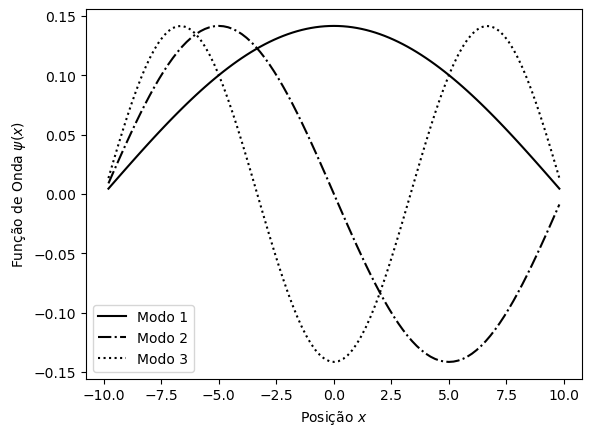

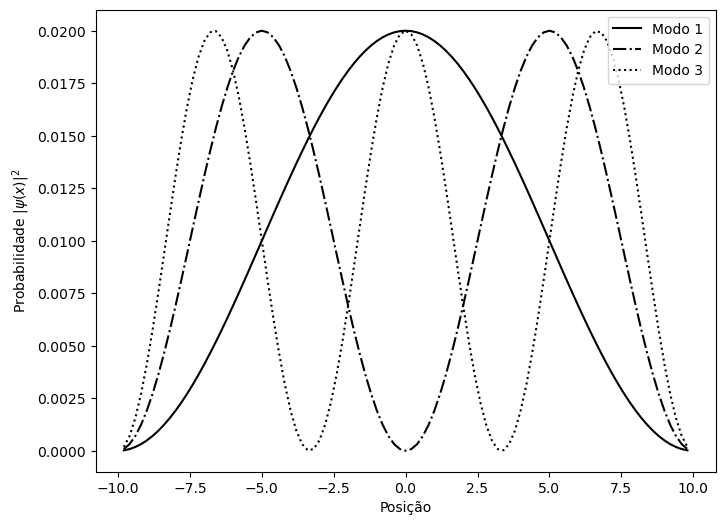

In [51]:
num_elements = num_elements
nodes_particula_livre, eigenvalues_particula_livre, eigenvectors_particula_livre = solve_schrodinger_equation(num_elements, L, V, num_modes)
plot_solution(nodes_particula_livre, eigenvalues_particula_livre, eigenvectors_particula_livre)
plot_solution_probality(nodes_particula_livre, eigenvalues_particula_livre, eigenvectors_particula_livre)


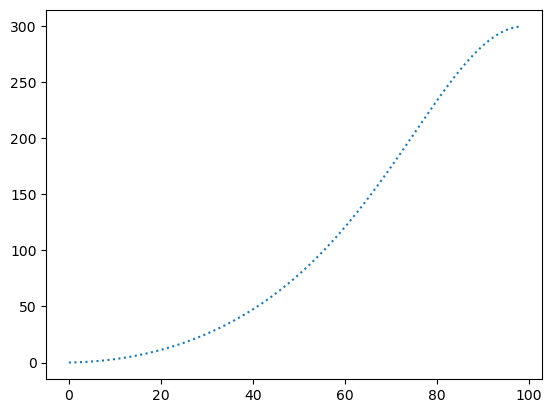

In [52]:
def plot_eigenvalues(eigenvalues):
    plt.plot(eigenvalues, linestyle=':')
    plt.show()

plot_eigenvalues(eigenvalues_particula_livre)

## Aplicação no problema do oscilador harmônico quântico

In [53]:
def plot_solution(nodes, eigenvalues, eigenvectors):
    styles = ['-', '-.', ':']
    for i in range(min(3, len(eigenvalues))):
        plt.plot(nodes, eigenvectors[:, i], label=f'Modo {i+1}', linestyle=styles[i], color='black')

    plt.xlabel('Posição $x$')
    plt.ylabel('Função de Onda $\psi(x)$')
    plt.legend()
    plt.savefig('solucao_da_equacao_de_schrodinger_oscilador_harmonico.png')
    plt.show()


In [54]:
def plot_solution_probality(nodes, eigenvalues, eigenvectors):
    styles = ['-', '-.', ':']
    for i in range(min(3, len(eigenvalues))):
        plt.plot(nodes, np.abs(eigenvectors[:, i])**2, label=f'Modo {i+1}', linestyle=styles[i], color='black')

    plt.xlabel('Posição $x$')
    plt.ylabel('Probabilidade $|\psi(x)|^2$')
    plt.legend()
    plt.savefig('solucao_da_equacao_de_schrodinger_oscilador_harmonico_probabilidade.png')
    plt.show()


In [55]:
# Exemplo de uso com um poço de potencial oscilador harmônico quântico
def V(x):
    return 1/2 * k * x**2


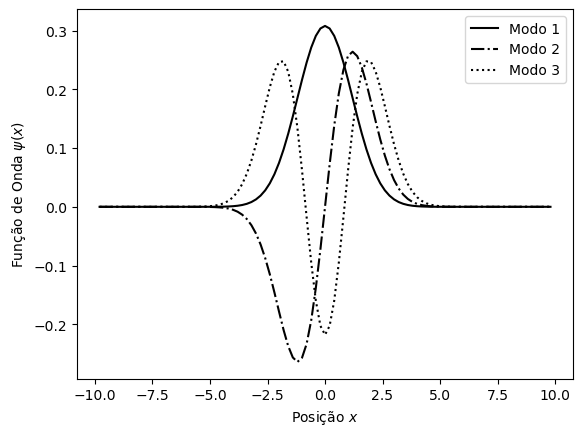

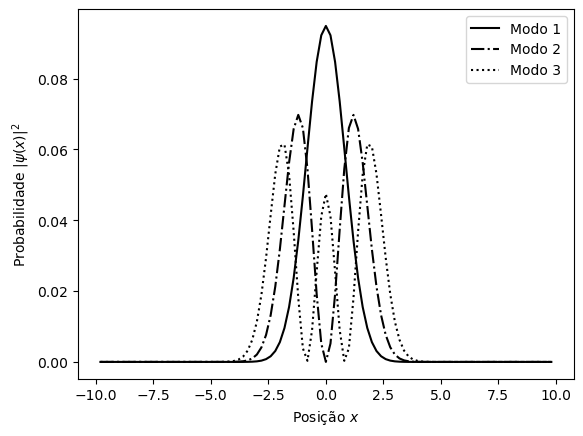

In [56]:
num_elements = num_elements
nodes_oscilador_harmonico, eigenvalues_oscilador_harmonico, eigenvectors_oscilador_harmonico = solve_schrodinger_equation(num_elements, L, V, num_modes)
plot_solution(nodes_oscilador_harmonico, eigenvalues_oscilador_harmonico, eigenvectors_oscilador_harmonico)
plot_solution_probality(nodes_oscilador_harmonico, eigenvalues_oscilador_harmonico, eigenvectors_oscilador_harmonico)


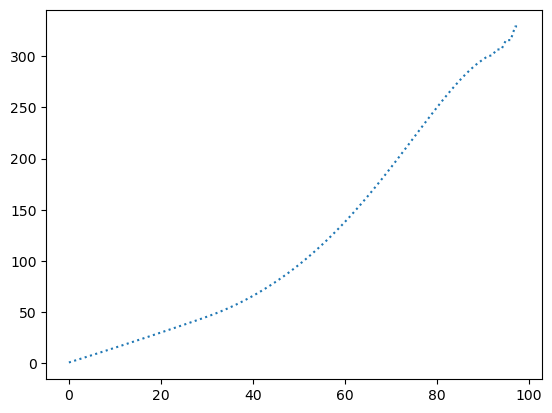

In [57]:
plot_eigenvalues(eigenvalues_oscilador_harmonico)

# Método das difereças finitas

## Aplicação do método das diferenças finitas no problema de uma partícula em uma caixa

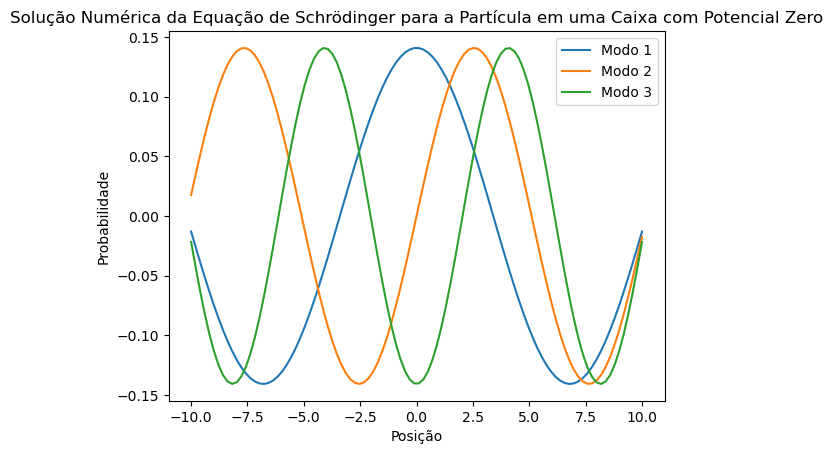

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigs
from scipy.sparse import diags

def solve_schrodinger_fd(L, N, V, num_modes=3):
    h = L / N

    # Matrizes para armazenar a diagonal principal e as diagonais adjacentes
    main_diag = np.zeros(N)
    off_diag = np.zeros(N-1)

    # Construindo a matriz tridiagonal do operador Hamiltoniano
    main_diag[:] = 2 / h**2 + V  # Diagonal principal
    off_diag[:] = -1 / h**2       # Diagonais adjacentes

    # Construção da matriz tridiagonal esparsa
    diagonals = [main_diag, off_diag, off_diag]
    H = diags(diagonals, [0, -1, 1], format='csr')

    # Encontrando os autovalores e autovetores
    eigenvalues, eigenvectors = eigs(H.toarray(), k=num_modes, which='SM', maxiter=10000)

    # Selecionando os modos de menor energia
    sorted_indices = np.argsort(eigenvalues.real)
    eigenvalues = eigenvalues[sorted_indices].real
    eigenvectors = eigenvectors[:, sorted_indices].real

    # Posições na grade
    x = np.linspace(-L/2, L/2, N)

    return x, eigenvalues, eigenvectors

# Exemplo de uso
N = num_elements    # Número de pontos na grade
V = np.zeros(N)  # Potencial zero para este exemplo

x_particula_livre, eigenvalues_fd_particula_livre, eigenvectors_fd_particula_livre = solve_schrodinger_fd(L, N, V, num_modes)

# Plotando os modos de onda
num_modes_plot = min(3, len(eigenvalues_fd_particula_livre))
for i in range(num_modes_plot):
    plt.plot(x_particula_livre, eigenvectors_fd_particula_livre[:, i+2], label=f'Modo {i+1}')

plt.xlabel('Posição')
plt.ylabel('Probabilidade')
plt.title('Solução Numérica da Equação de Schrödinger para a Partícula em uma Caixa com Potencial Zero')
plt.legend()
plt.show()


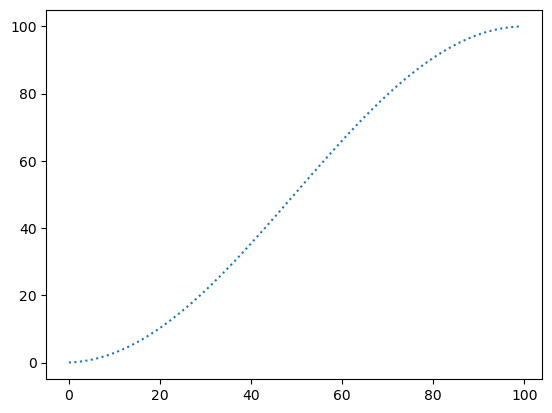

In [59]:
plot_eigenvalues(eigenvalues_fd_particula_livre)

## Aplicação do método das diferenças finitas no problema do oscilador harmônico quântico

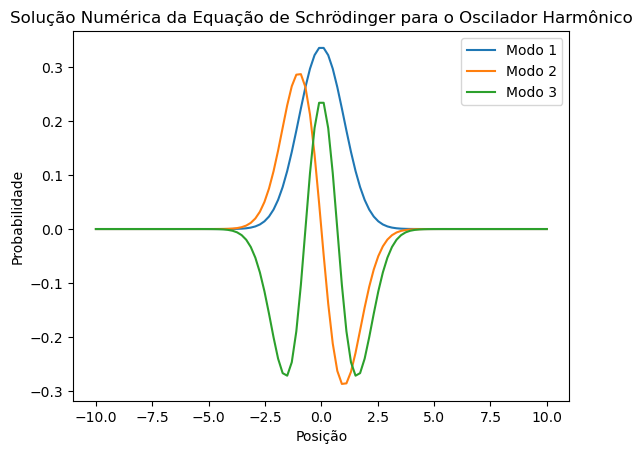

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import eigs

def solve_schrodinger_fd_harmonic(L, N, omega, num_modes=3):
    h = L / N

    # Construindo o potencial para o oscilador harmônico
    x = np.linspace(-L/2, L/2, N)
    V = 0.5 * m * (omega * x)**2

    # Construção da matriz tridiagonal do operador Hamiltoniano
    main_diag = 1 / h**2 + V
    off_diag = -0.5 / h**2 * np.ones(N-1)

    # Construção da matriz tridiagonal esparsa
    diagonals = [main_diag, off_diag, off_diag]
    H = diags(diagonals, [0, -1, 1], format='csr')

    # Encontrando os autovalores e autovetores
    eigenvalues, eigenvectors = eigs(H.toarray(), k=num_modes, which='SM')

    # Ordenando os autovalores e autovetores
    sorted_indices = np.argsort(eigenvalues.real)
    eigenvalues = eigenvalues[sorted_indices].real
    eigenvectors = eigenvectors[:, sorted_indices].real

    return x, eigenvalues, eigenvectors

# Parâmetros do problema
N = num_elements        # Número de pontos na grade

# Resolvendo a equação de Schrödinger para o oscilador harmônico
x_oscilador_harmonico, eigenvalues_fd_oscilador_harmonico, eigenvectors_fd_oscilador_harmonico = solve_schrodinger_fd_harmonic(L, N, omega, num_modes)

# Plotando os modos de onda
num_modes_plot = min(3, len(eigenvalues_fd_oscilador_harmonico))
for i in range(num_modes_plot):
    plt.plot(x_oscilador_harmonico, eigenvectors_fd_oscilador_harmonico[:, i], label=f'Modo {i+1}')

plt.xlabel('Posição')
plt.ylabel('Probabilidade')
plt.title('Solução Numérica da Equação de Schrödinger para o Oscilador Harmônico')
plt.legend()
plt.show()


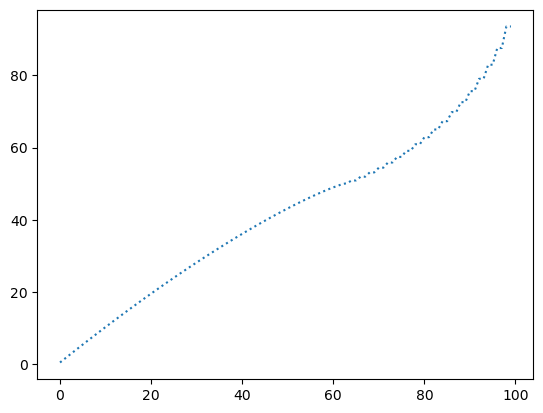

In [61]:
plot_eigenvalues(eigenvalues_fd_oscilador_harmonico)

# Soluções analíticas

## Energias do sistema para o problema de uma partícula em uma caixa

Energias Analíticas da Partícula em uma Caixa:


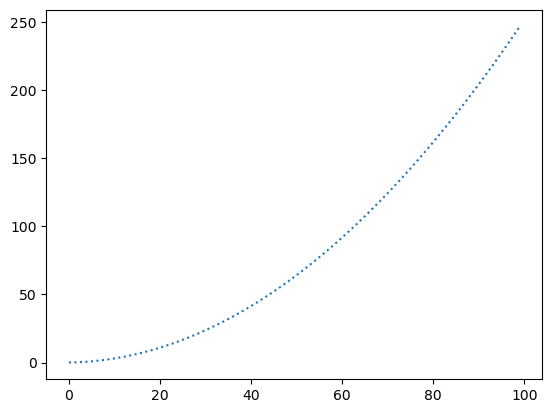

In [62]:
def calculate_analytical_energies_box(num_states, m, L):
    # Cálculo das energias analíticas
    energies = (np.arange(1, num_states + 1) ** 2) * (np.pi ** 2) * (h_bar ** 2) / (2 * m * L ** 2)

    return energies

# Teste da função
num_states = num_modes
analytical_energies_particula_livre = calculate_analytical_energies_box(num_states, m, L)
print("Energias Analíticas da Partícula em uma Caixa:")
plt.plot(analytical_energies_particula_livre, linestyle=':')


## Energias do sistema do problema do oscilador harmônico quântico

100
Energias Analíticas do Oscilador Harmônico:


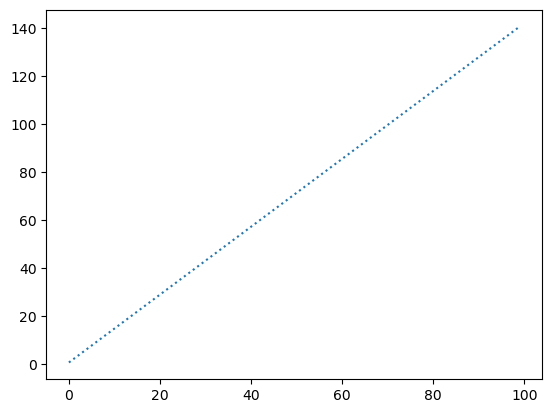

In [63]:
def calculate_analytical_energies(num_states, omega):
    # Cálculo das energias analíticas
    energies = h_bar * omega * (np.arange(num_states) + 0.5)

    return energies

# Teste da função
num_states = num_modes
print(num_modes)
analytical_energies_oscilador_harmonico = calculate_analytical_energies(num_states, omega)
print("Energias Analíticas do Oscilador Harmônico:")
plt.plot(analytical_energies_oscilador_harmonico, linestyle=':')


# Energias dos sistemas

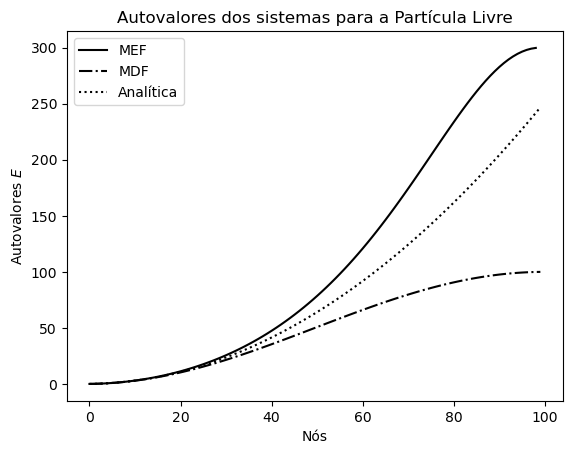

In [64]:
plt.plot(eigenvalues_particula_livre, label='MEF', linestyle='-', color='black')
plt.plot(eigenvalues_fd_particula_livre, label='MDF', linestyle='-.', color='black')
plt.plot(analytical_energies_particula_livre, label='Analítica', linestyle=':', color='black')
plt.xlabel('Nós')
plt.ylabel('Autovalores $E$')
plt.title('Autovalores dos sistemas para a Partícula Livre')
plt.legend()
plt.savefig('autovalores_dos_sistemas_para_a_particula_livre.png')
plt.show()

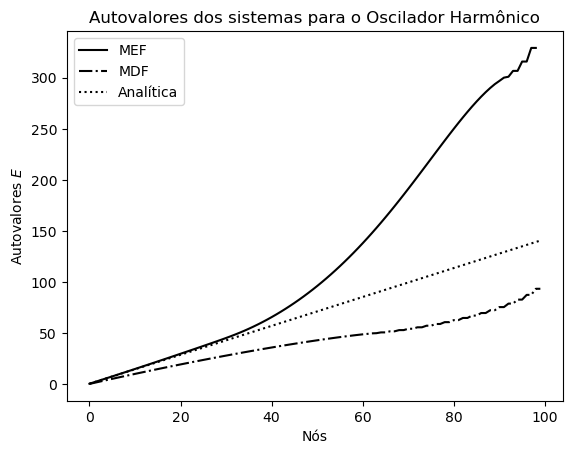

In [65]:
plt.plot(eigenvalues_oscilador_harmonico, label='MEF', linestyle='-', color='black')
plt.plot(eigenvalues_fd_oscilador_harmonico, label='MDF', linestyle='-.', color='black')
plt.plot(analytical_energies_oscilador_harmonico, label='Analítica', linestyle=':', color='black')
plt.xlabel('Nós')
plt.ylabel('Autovalores $E$')
plt.title('Autovalores dos sistemas para o Oscilador Harmônico')
plt.legend()
plt.savefig('autovalores_dos_sistemas_para_o_oscilador_harmonico.png')
plt.show()

In [66]:
eigenvalues_fd_particula_livre = np.delete(eigenvalues_fd_particula_livre, -1)
analytical_energies_particula_livre = np.delete(analytical_energies_particula_livre, -1)

erros_metodo1 = [abs(a - exato) for a, exato in zip(eigenvalues_particula_livre, analytical_energies_particula_livre)]
erros_metodo2 = [abs(a - exato) for a, exato in zip(eigenvalues_fd_particula_livre, analytical_energies_particula_livre)]

# Construa um dicionário com os dados
data = {
    'Autovalores Exatos': analytical_energies_particula_livre,
    'Autovalores Método dos elementos finitos': eigenvalues_particula_livre,
    'Autovalores Método das diferenças finitas': eigenvalues_fd_particula_livre,
    'Erro Método dos elementos finitos': erros_metodo1,
    'Erro Método das diferenças finitas': erros_metodo2
}

# Crie um DataFrame Pandas
df = pd.DataFrame(data)

# Exiba o DataFrame
df_10_primeiros = df.head(10)

# Salvar em um arquivo CSV
df_10_primeiros.to_csv('autovalores_particula_livre.csv')


In [67]:
eigenvalues_fd_oscilador_harmonico = np.delete(eigenvalues_fd_oscilador_harmonico, -1)
analytical_energies_oscilador_harmonico = np.delete(analytical_energies_oscilador_harmonico, -1)

erros_metodo1 = [abs(a - exato) for a, exato in zip(eigenvalues_oscilador_harmonico, analytical_energies_oscilador_harmonico)]
erros_metodo2 = [abs(a - exato) for a, exato in zip(eigenvalues_fd_oscilador_harmonico, analytical_energies_oscilador_harmonico)]

# Construa um dicionário com os dados
data = {
    'Autovalores Exatos': analytical_energies_oscilador_harmonico,
    'Autovalores Método dos elementos finitos': eigenvalues_oscilador_harmonico,
    'Autovalores Método das diferenças finitas': eigenvalues_fd_oscilador_harmonico,
    'Erro Método dos elementos finitos': erros_metodo1,
    'Erro Método das diferenças finitas': erros_metodo2
}

# Crie um DataFrame Pandas
df = pd.DataFrame(data)

# Exiba o DataFrame
df_10_primeiros = df.head(10)

# Salvar em um arquivo CSV
df_10_primeiros.to_csv('autovalores_oscilador_harmonico.csv')
